In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Data Exploration

In [2]:
df = pd.read_csv('../data/train-data.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [4]:
pd.options.display.float_format = '{:,.1f}'.format
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,"6,019.0","6,019.0","6,019.0","5,977.0","6,019.0"
mean,"3,009.0","2,013.4","58,738.4",5.3,9.5
std,"1,737.7",3.3,"91,268.8",0.8,11.2
min,0.0,"1,998.0",171.0,0.0,0.4
25%,"1,504.5","2,011.0","34,000.0",5.0,3.5
50%,"3,009.0","2,014.0","53,000.0",5.0,5.6
75%,"4,513.5","2,016.0","73,000.0",5.0,9.9
max,"6,018.0","2,019.0","6,500,000.0",10.0,160.0


In [5]:
df.describe(include='O')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


In [9]:
import os
from ydata_profiling import ProfileReport

# Create reports directory if it doesn't exist
os.makedirs("../reports", exist_ok=True)

profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("../reports/first-exploration.html")

Summarize dataset:  54%|█████▍    | 25/46 [00:00<00:01, 20.39it/s, scatter Seats, Year]                  

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 218.04it/s]


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
pd.options.display.float_format = '{:,.3f}'.format
df.isnull().mean() *100

Unnamed: 0           0.000
Name                 0.000
Location             0.000
Year                 0.000
Kilometers_Driven    0.000
Fuel_Type            0.000
Transmission         0.000
Owner_Type           0.000
Mileage              0.033
Engine               0.598
Power                0.598
Seats                0.698
New_Price           86.310
Price                0.000
dtype: float64

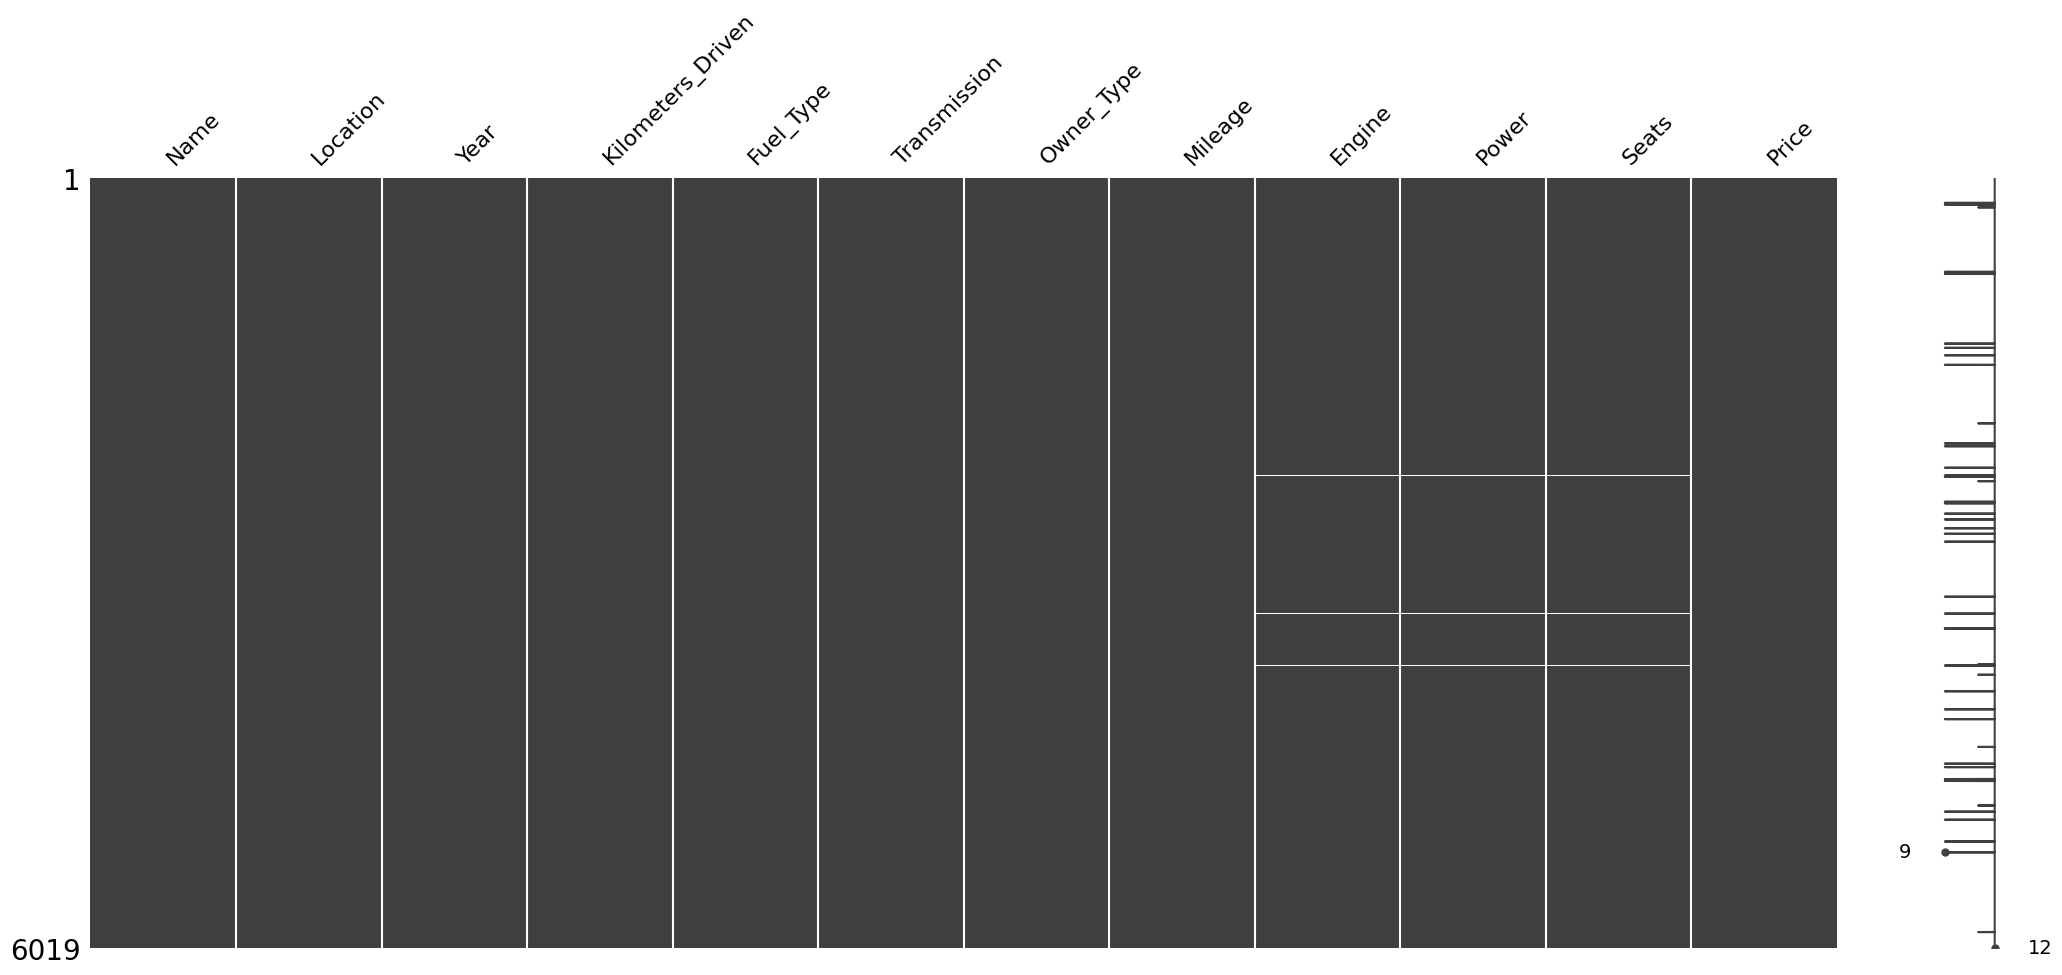

In [20]:
import missingno as msno

msno.matrix(df)
plt.show()

<Axes: >

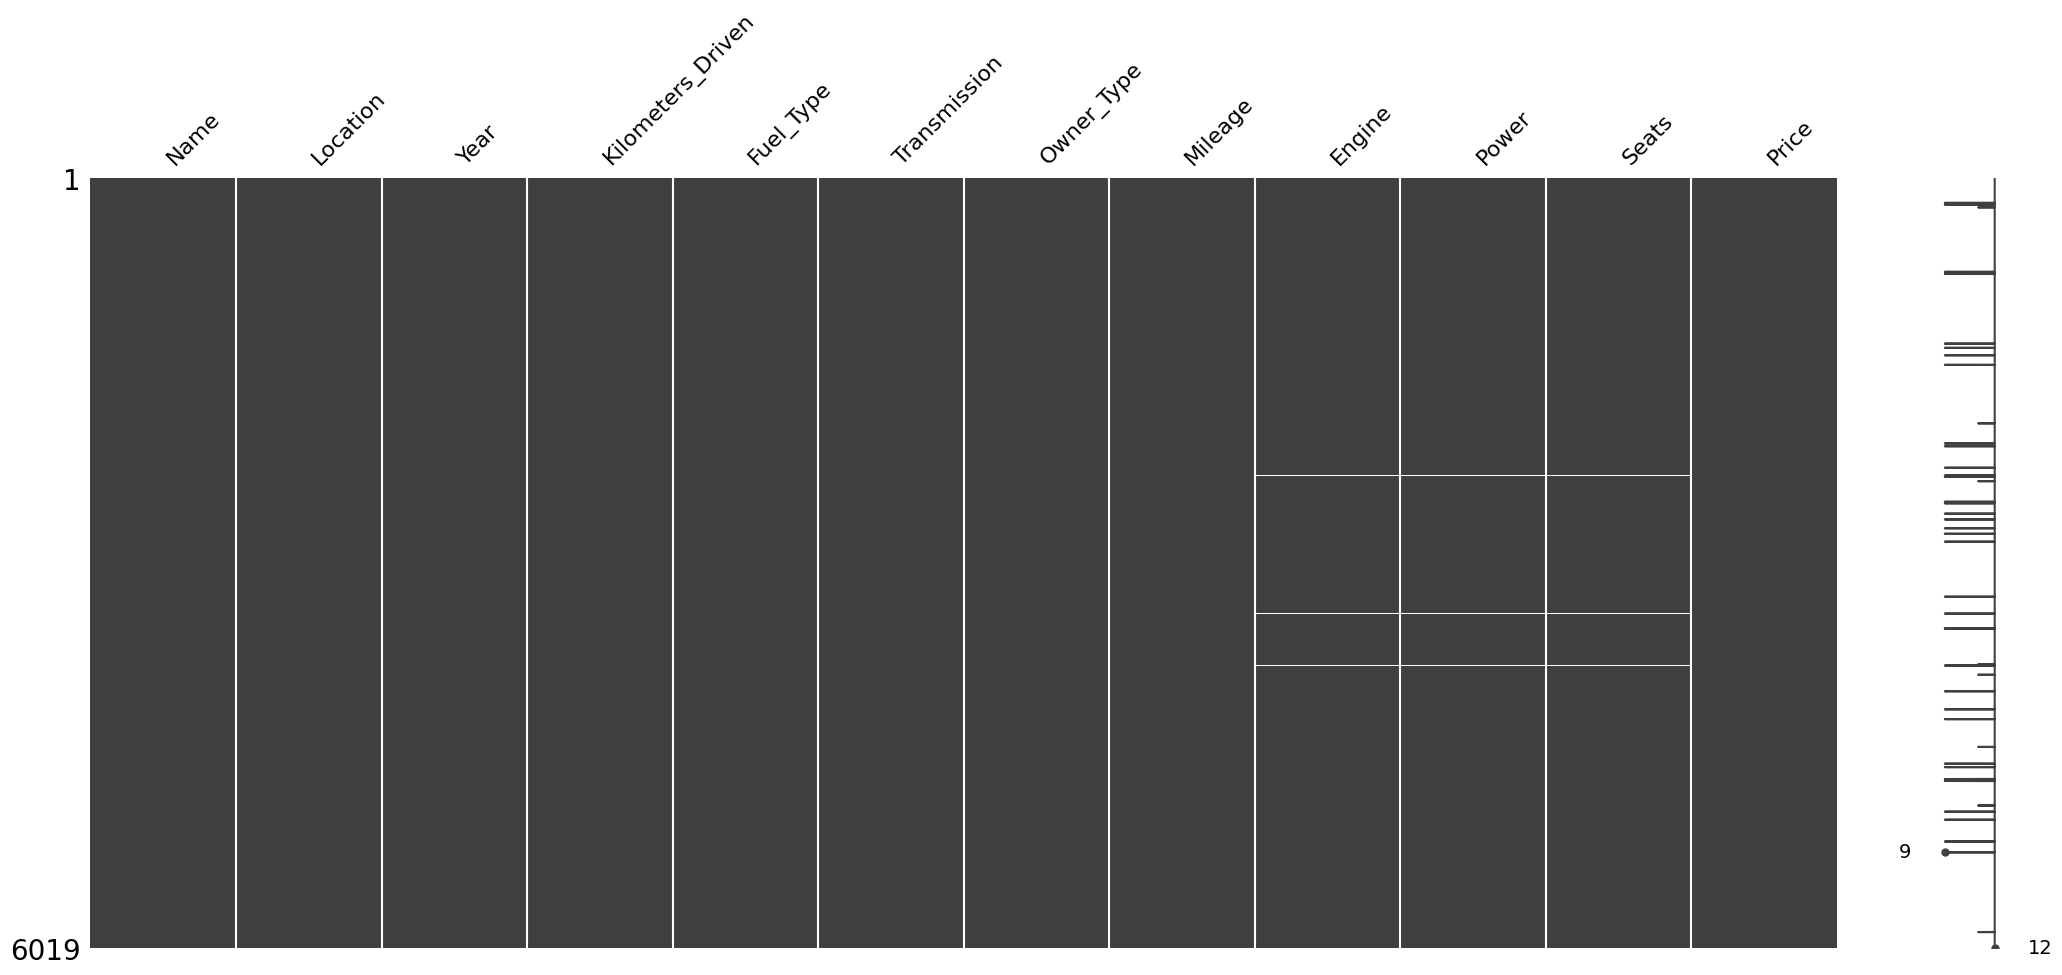

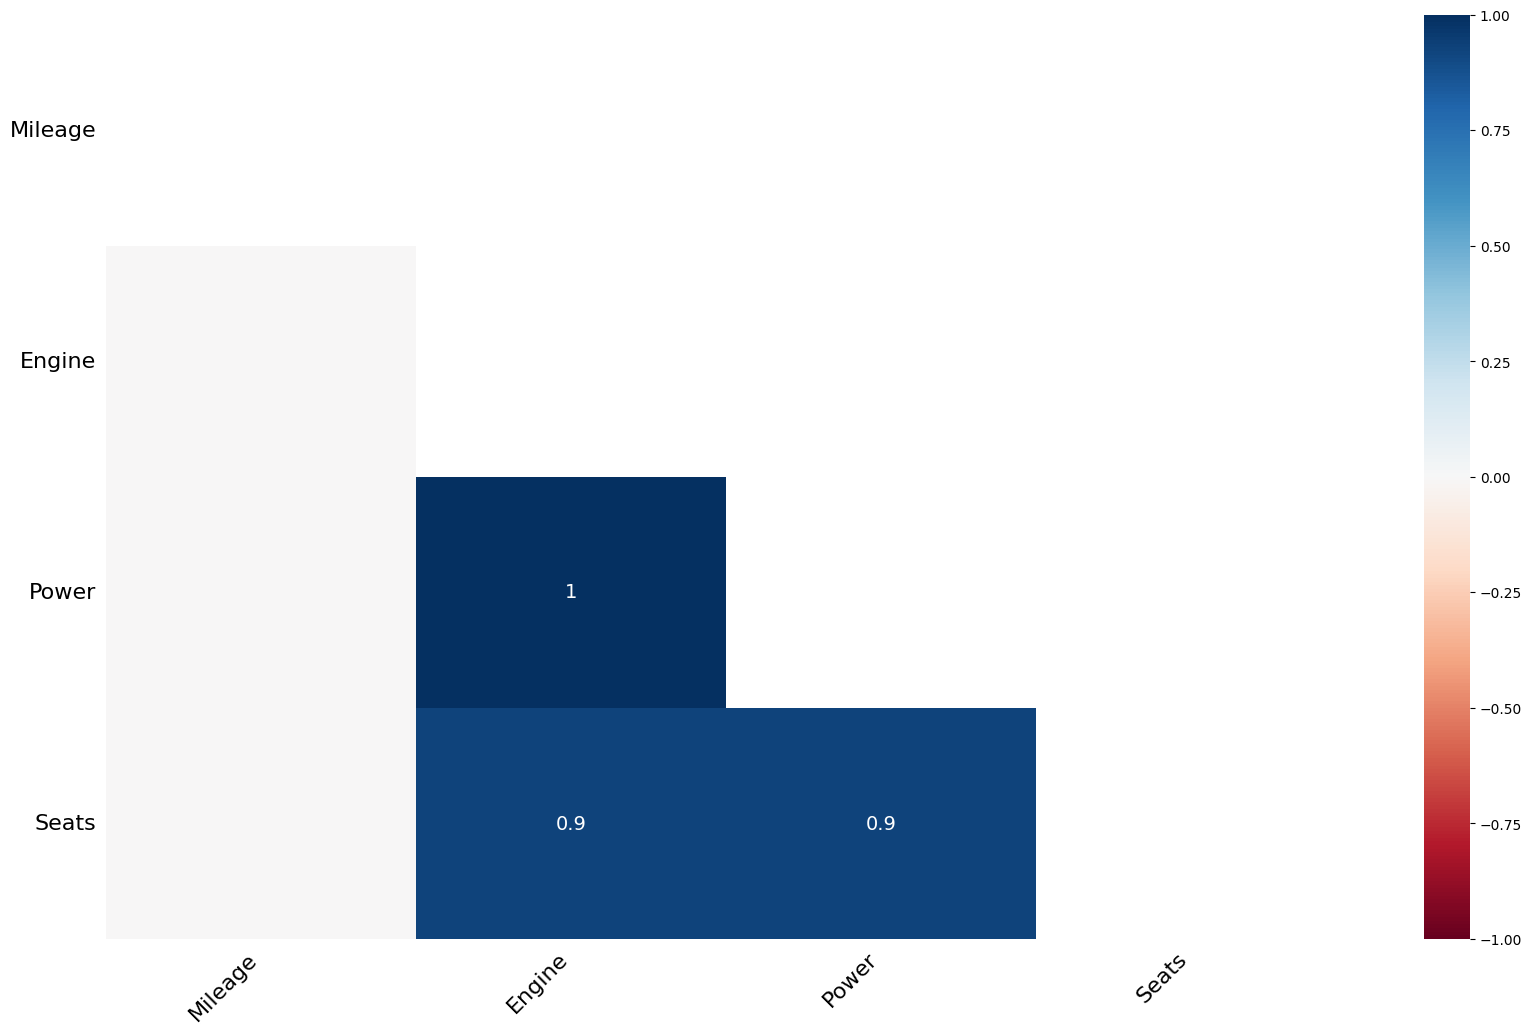

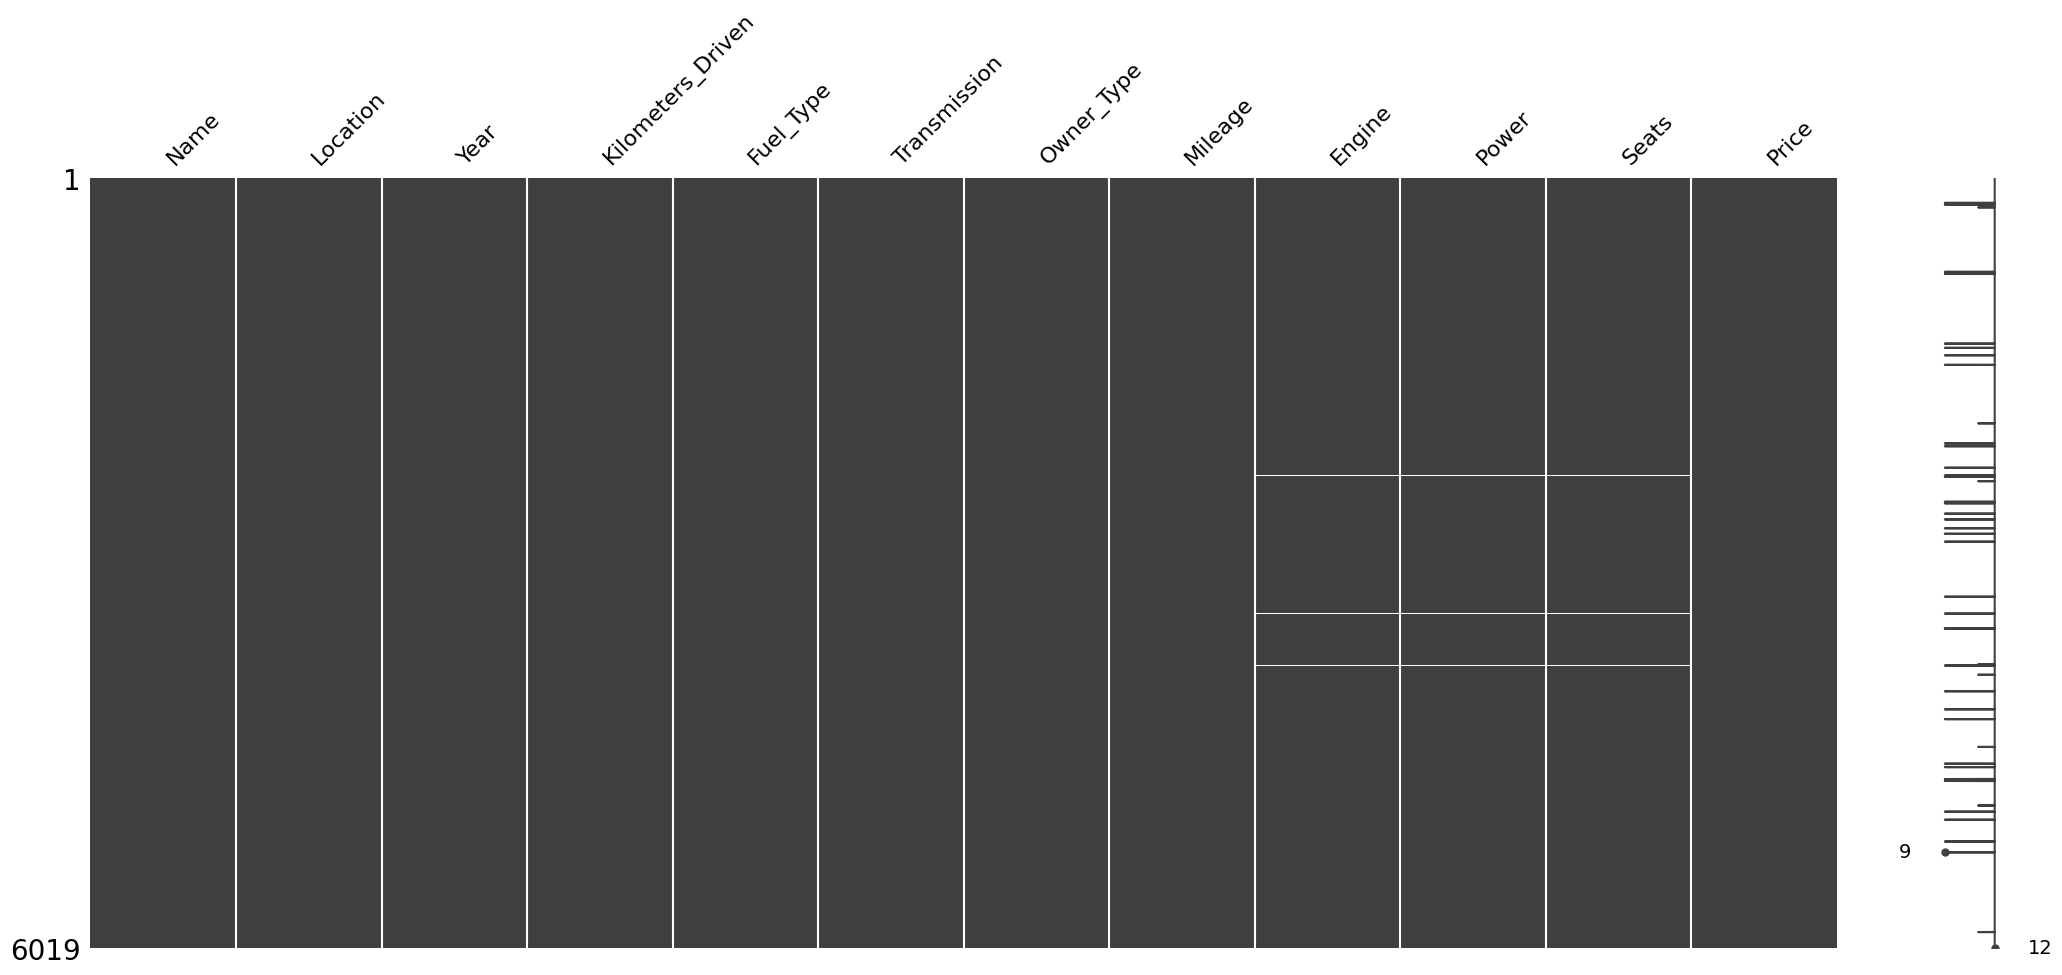

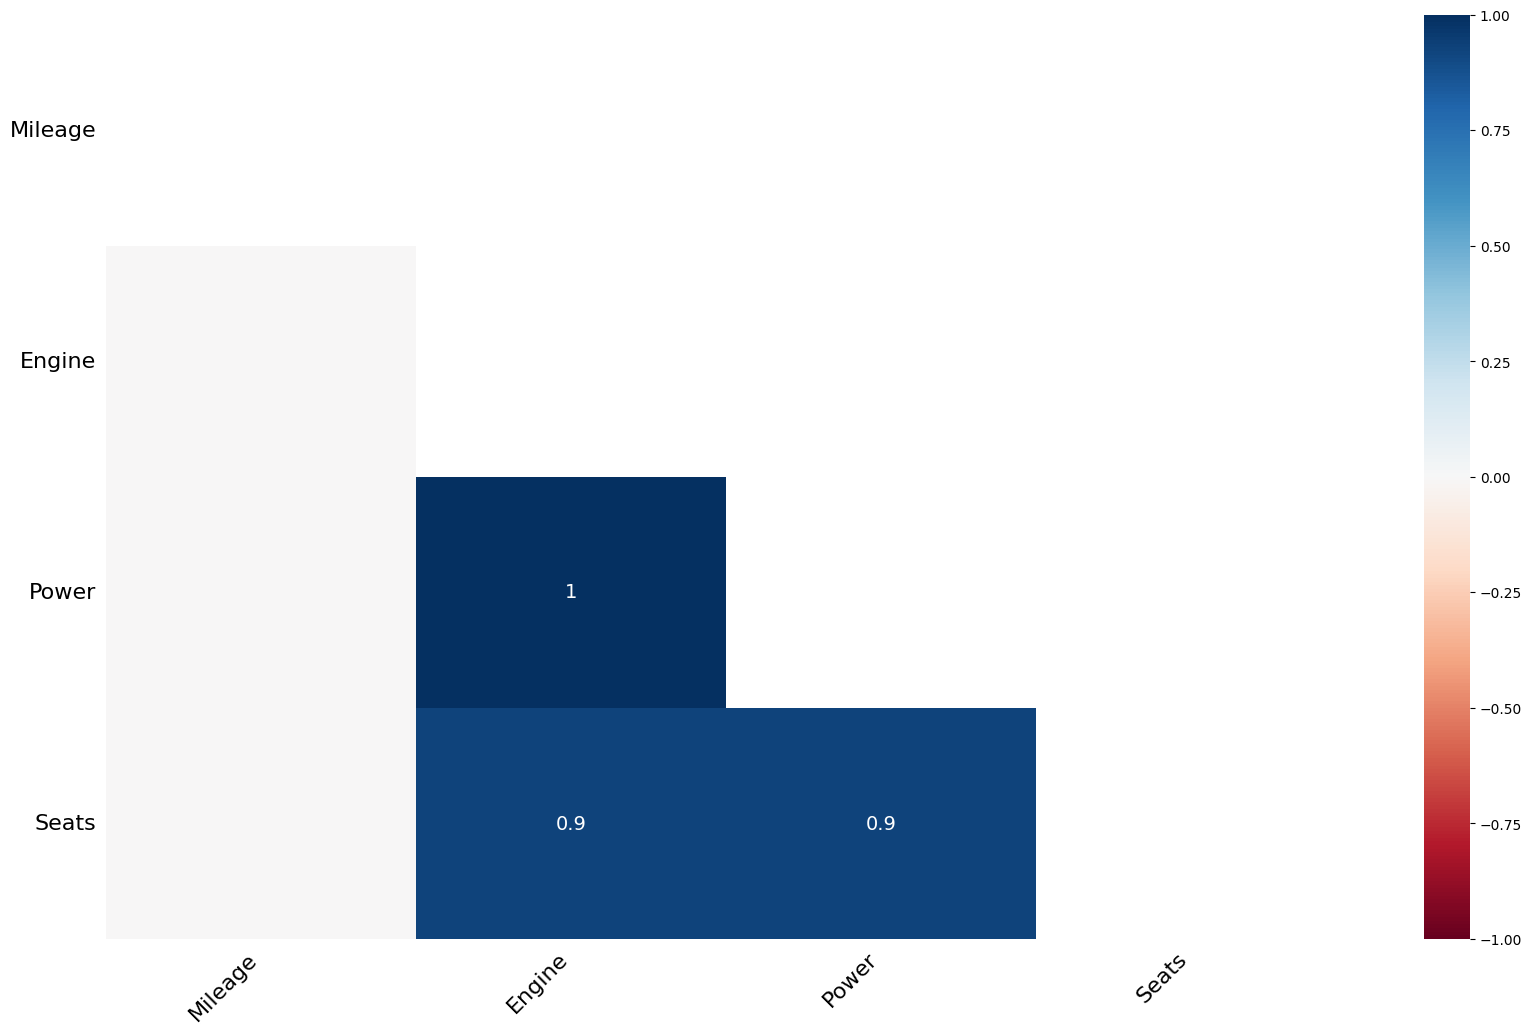

In [19]:
msno.heatmap(df)

In [12]:
# Drop Unnamed: 0 & New Price
df.drop(columns=['Unnamed: 0', 'New_Price'], inplace=True)

In [13]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    fig = px.histogram(df, x=col, marginal='box', title=f'Distribution of {col}', nbins=30)
    fig.show()


After our initial exploration, here are the key observations and our planned approach for preprocessing each feature:

---

#### **Data Cleaning & Feature Engineering Plan**

| Feature            | Type              | Observations                                                      | Action Plan                                                                 |
|--------------------|-------------------|-------------------------------------------------------------------|------------------------------------------------------------------------------|
| **Unnamed: 0**     | Integer           | Appears to be an index column                                     | **Drop** — redundant as pandas has its own index                            |
| **Name**           | Object    | Contains full car name with brand and model information           | **Feature engineering** — extract **Brand** and **Model** as separate features |
| **Location**       | Object    | Categorical variable representing city/location                   | **Encoding** — use appropriate categorical encoding technique                |
| **Year**           | Integer           | Manufacturing year of the vehicle                                 | **Transform** — create `Age` feature: `Current_Year - Year` or `(Max_Year + 1 - Year)` |
| **Kilometers_Driven** | Integer        | Total distance driven by the vehicle                              | **Handle outliers** — identify and treat extreme values                      |
| **Fuel_Type**      | Object    | Type of fuel the vehicle uses                                     | **Encoding** — convert to numerical representation; **special attention** to “Electric” |
| **Transmission**   | Object    | Type of transmission (Manual/Automatic)                           | **Encoding** — convert to binary/ordinal representation                      |
| **Owner_Type**     | Object    | Number of previous owners                                         | **Encoding** — apply ordinal encoding where appropriate                      |
| **Mileage**        | Object    | Contains numbers with units (e.g., km/kg, kmpl)                   | **Extract numeric values** — remove units and convert to float               |
| **Engine**         | Object    | Contains numbers with units (CC)                                  | **Extract numeric values** — remove `CC` and convert to float                |
| **Power**          | Object    | Contains numbers with units (bhp)                                 | **Extract numeric values** — remove `bhp` and convert to float               |
| **Seats**          | Float             | Number of seats; zeros may indicate missing data                  | **Handle zeros** — treat zeros as missing and **impute** appropriately       |
| **New_Price**      | Object    | Price of new version of the vehicle                               | **Drop** — too many missing values (insufficient for reliable imputation)    |

---

#### **Key Challenges Identified**

- **Mixed data types:** Several columns (`Mileage`, `Engine`, `Power`) contain numbers with units that need extraction.  
- **Categorical variables:** Multiple features need encoding (`Location`, `Fuel_Type`, `Transmission`, `Owner_Type`).  
- **Temporal data:** `Year` needs transformation into a more meaningful feature (`Age`).  
- **Potential outliers:** `Kilometers_Driven` likely contains extreme values that need treatment.  
- **Missing data:** `New_Price` has excessive missing values; `Seats` may have zeros representing missing data.  
- **Special categories:** `'Electric'` in `Fuel_Type` may require special handling due to different characteristics.
